In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import zipfile

zip_path = '/content/gdrive/MyDrive/train.zip'
extract_path = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
# Implementación de interpolación se realiza por truncamiento
def geo_transformation(X,tamano_deseado,Yshape=None):

  h = X.shape[1] / tamano_deseado
  w = X.shape[0] / tamano_deseado

  a11 = w
  a12 = 0
  a13 = 0

  a21 = 0
  a22 = h
  a23 = 0

  a1 = np.array([a11,a12,a13])
  a2 = np.array([a21,a22,a23])

  A  = np.vstack([a1,a2])

  if Yshape is None:
    (N,M) = X.shape
  else:
    (N,M) = Yshape
  Y = np.zeros((N,M),np.uint8)

  m = np.ones((N*M,3))
  t = 0
  for i in range(N):
    for j in range(M):
      m[t,0:3] = [i,j,1]
      t = t+1

  m0  = np.dot(A,m.T)          # (i,j) -> (i0,j0) usando ecuación indicada arriba
  mpf = np.fix(m0).astype(int) # truncamiento

  # verificación que las coordenadas (i0,j0) pertenezcan a la imagen
  i0 = mpf[0,:]
  j0 = mpf[1,:]
  kti = np.logical_and(i0>=0,i0<N)
  ktj = np.logical_and(j0>=0,j0<M)
  kt  = np.logical_and(kti,ktj)

  # poblamiento de la imagen de salida
  t = 0
  for i in range(N):
    for j in range(M):
      if kt[t]:
        Y[i,j] = X[i0[t],j0[t]]
      t = t+1
  Y= Y[0:tamaño_deseado, 0:tamaño_deseado] #se recorta la imagen al tamaño deseado
  return Y

In [ ]:
# MOSTRANDO LAS 5 PRIMERAS IMAGENES DE ARTICULATED_TRUCK
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

folder_path = '/content/train/articulated_truck'  # Ruta de la carpeta que contiene las imágenes

# Obtener la lista de archivos en la carpeta
files = os.listdir(folder_path)

# Visualizar las primeras 5 imágenes
for i in range(5):
    image_path = os.path.join(folder_path, files[i])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


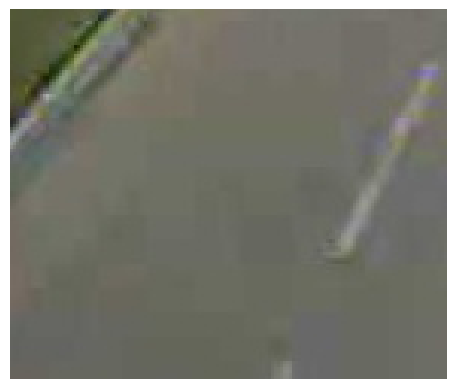

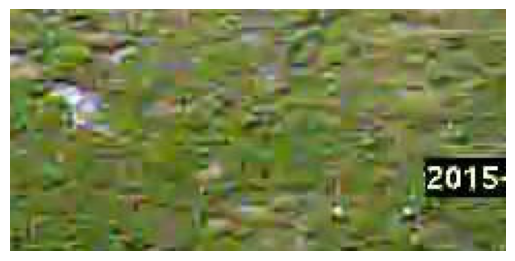

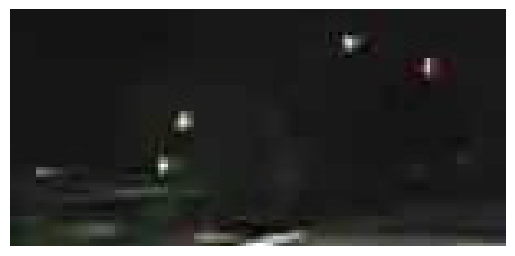

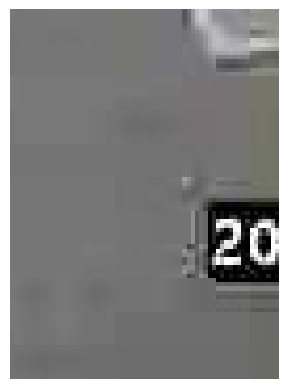

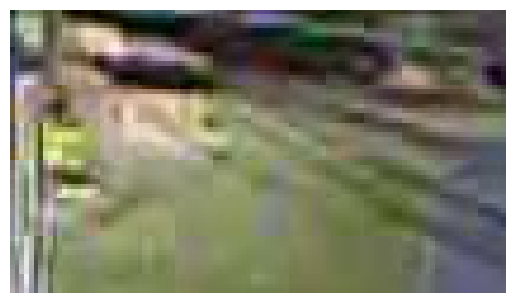

In [ ]:
# MOSTRANDO LAS 5 PRIMERAS IMAGENES DE BACKGROUND
folder_path = '/content/train/background'  # Ruta de la carpeta que contiene las imágenes

# Obtener la lista de archivos en la carpeta
files = os.listdir(folder_path)

# Visualizar las primeras 5 imágenes
for i in range(5):

    image_path = os.path.join(folder_path, files[i])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

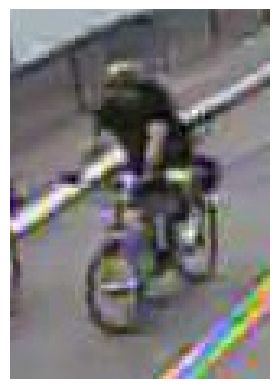

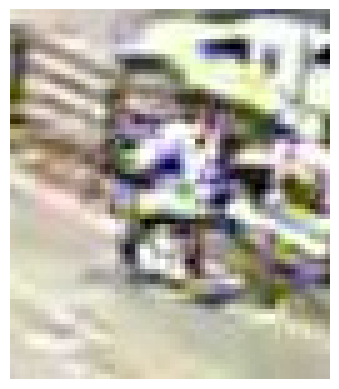

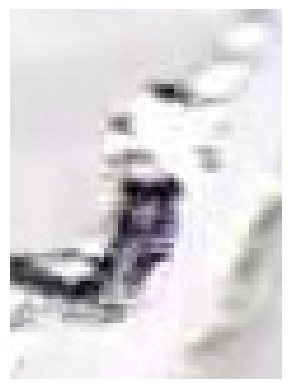

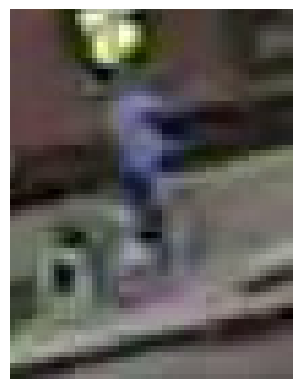

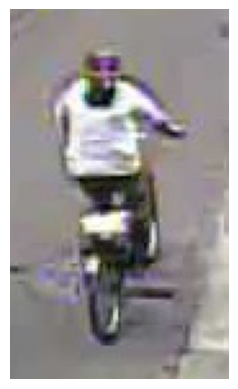

In [ ]:
# MOSTRANDO LAS 5 PRIMERAS IMAGENES DE BACKGROUND
folder_path = '/content/train/bicycle'  # Ruta de la carpeta que contiene las imágenes

# Obtener la lista de archivos en la carpeta
files = os.listdir(folder_path)

# Visualizar las primeras 5 imágenes
for i in range(5):
    image_path = os.path.join(folder_path, files[i])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

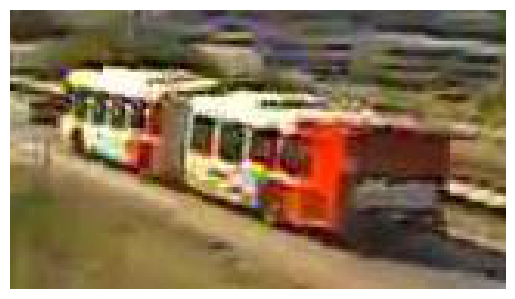

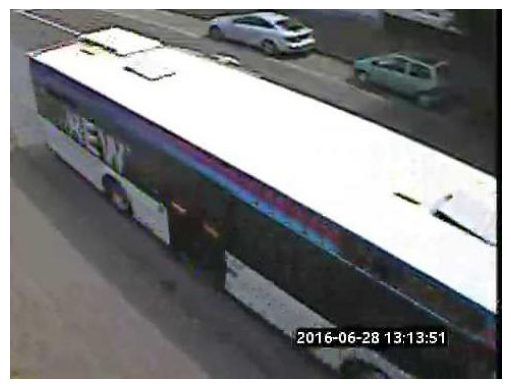

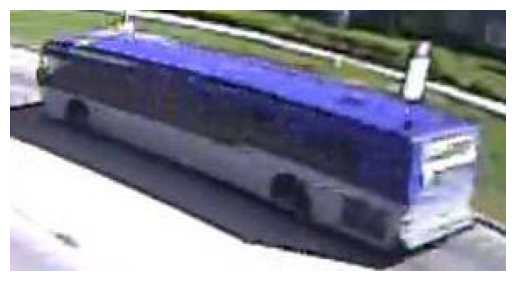

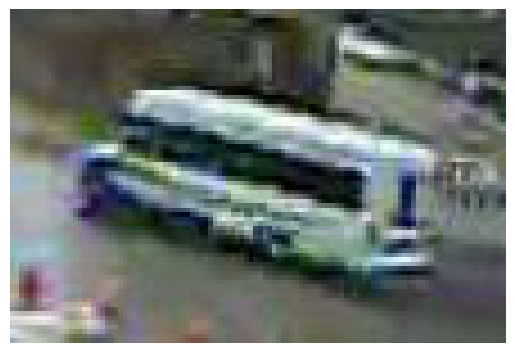

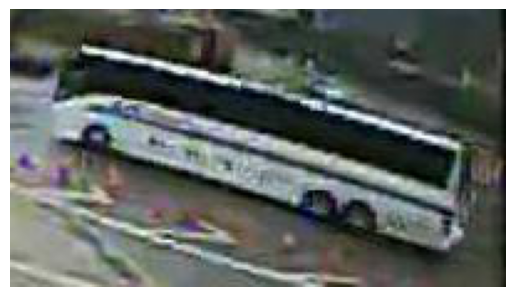

In [ ]:
# MOSTRANDO LAS 5 PRIMERAS IMAGENES DE BUS
folder_path = '/content/train/bus'  # Ruta de la carpeta que contiene las imágenes

# Obtener la lista de archivos en la carpeta
files = os.listdir(folder_path)

# Visualizar las primeras 5 imágenes
for i in range(5):
    image_path = os.path.join(folder_path, files[i])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

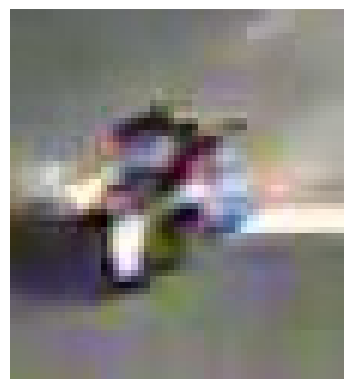

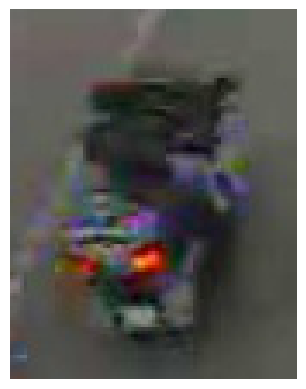

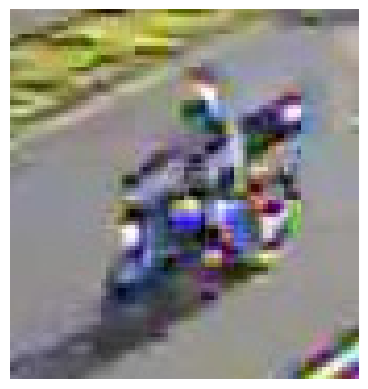

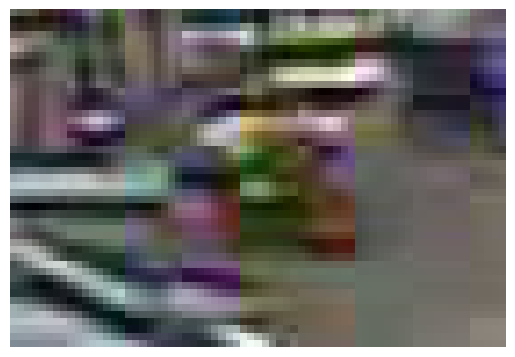

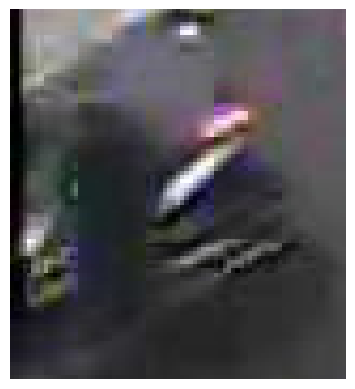

In [ ]:
# MOSTRANDO LAS 5 PRIMERAS IMAGENES DE MOTOR_CYCLE
folder_path = '/content/train/motorcycle'  # Ruta de la carpeta que contiene las imágenes

# Obtener la lista de archivos en la carpeta
files = os.listdir(folder_path)

# Visualizar las primeras 5 imágenes
for i in range(5):
    image_path = os.path.join(folder_path, files[i])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

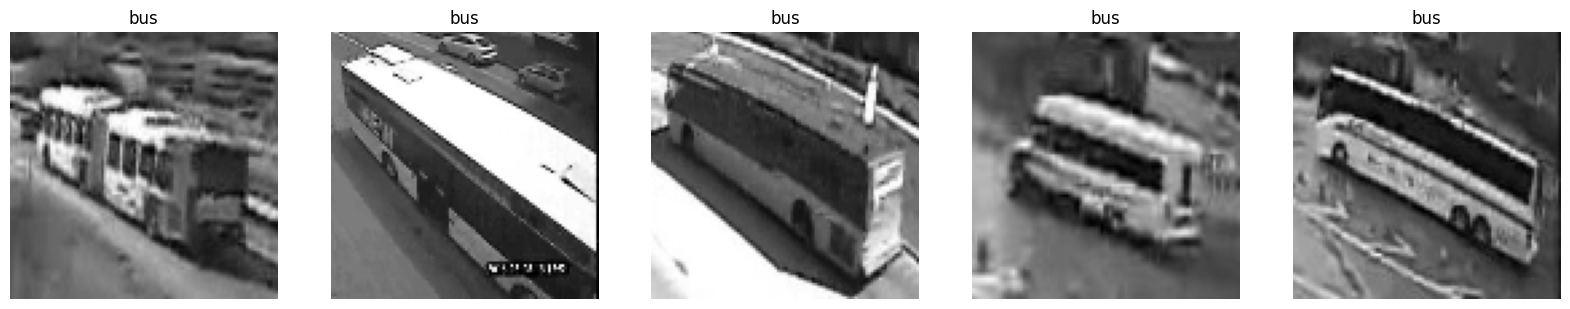

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

carpeta_imagenes = '/content/train/bus'  # Ruta de la carpeta que contiene las imágenes
datos_entrenamiento = []
TAMANO_IMG = 100
MAX_IMAGENES_POR_CARPETA = 500
# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

contador = 0  # Contador de imágenes seleccionadas por carpeta

for archivo in archivos:
    if contador >= MAX_IMAGENES_POR_CARPETA:
        break

    # Obtener la ruta completa del archivo de imagen
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)

    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen)

    # procesamiento de imagenes
    imagen_redimensionada = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen_redimensionada = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2GRAY)
    imagen_redimensionada = imagen_redimensionada.reshape(TAMANO_IMG, TAMANO_IMG, 1)

    # Agregar la imagen redimensionada y su etiqueta a la lista datos_entrenamiento
    datos_entrenamiento.append([imagen_redimensionada, "bus"])  # Reemplaza "etiqueta" con la etiqueta deseada
# Mostrar las primeras 5 imágenes
plt.figure(figsize=(20, 20))

for i in range(5):
    imagen = datos_entrenamiento[i][0]
    etiqueta = datos_entrenamiento[i][1]
    plt.subplot(1, 5, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.title(etiqueta)
    plt.axis('off')
plt.show()

In [ ]:
datos_bus=datos_entrenamiento
datos_bus[0]

[array([[[ 68],
         [ 79],
         [ 67],
         ...,
         [ 67],
         [ 65],
         [ 65]],
 
        [[ 67],
         [ 75],
         [ 65],
         ...,
         [ 97],
         [ 83],
         [ 67]],
 
        [[ 70],
         [ 74],
         [ 67],
         ...,
         [110],
         [ 93],
         [ 71]],
 
        ...,
 
        [[ 97],
         [105],
         [107],
         ...,
         [121],
         [108],
         [100]],
 
        [[ 98],
         [106],
         [107],
         ...,
         [130],
         [130],
         [133]],
 
        [[ 98],
         [106],
         [107],
         ...,
         [129],
         [133],
         [141]]], dtype=uint8),
 'bus']

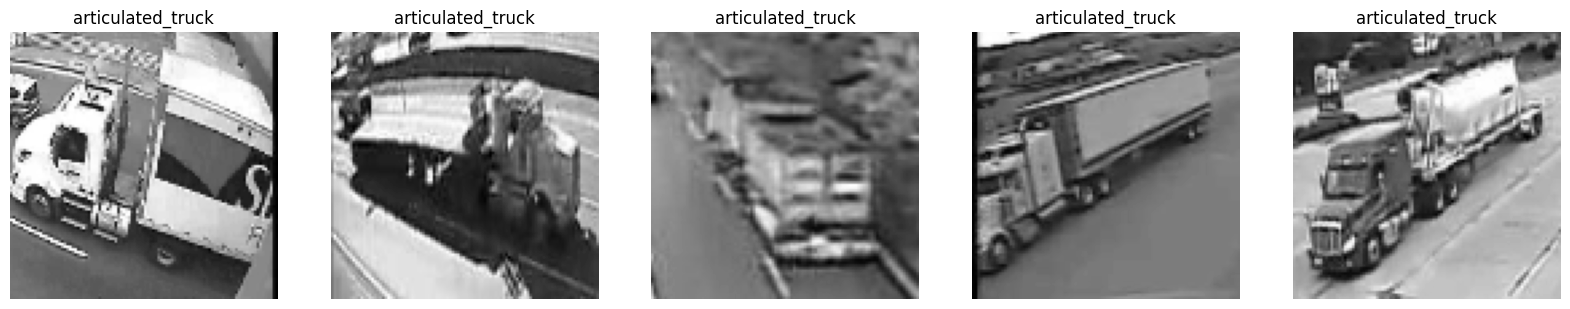

In [ ]:
import os
import cv2
import numpy as np

carpeta_imagenes = '/content/train/articulated_truck'  # Ruta de la carpeta que contiene las imágenes
datos_entrenamiento = []
TAMANO_IMG = 100
MAX_IMAGENES_POR_CARPETA = 500
# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

contador = 0  # Contador de imágenes seleccionadas por carpeta

for archivo in archivos:
    if contador >= MAX_IMAGENES_POR_CARPETA:
        break
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)

    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen)

    # procesamiento de imahe
    imagen_redimensionada = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen_redimensionada = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2GRAY)
    imagen_redimensionada = imagen_redimensionada.reshape(TAMANO_IMG, TAMANO_IMG, 1)

    # Agregar la imagen redimensionada y su etiqueta a la lista datos_entrenamiento
    datos_entrenamiento.append([imagen_redimensionada, "articulated_truck"])  # Reemplaza "etiqueta" con la etiqueta deseada
# Mostrar las primeras 5 imágenes
plt.figure(figsize=(20, 20))

for i in range(5):
    imagen = datos_entrenamiento[i][0]
    etiqueta = datos_entrenamiento[i][1]
    plt.subplot(1, 5, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.title(etiqueta)
    plt.axis('off')

plt.show()

In [ ]:
datos_articulated_truck=datos_entrenamiento
datos_articulated_truck[0]

[array([[[236],
         [186],
         [181],
         ...,
         [156],
         [ 17],
         [  0]],
 
        [[219],
         [245],
         [115],
         ...,
         [142],
         [ 21],
         [  2]],
 
        [[210],
         [248],
         [155],
         ...,
         [142],
         [ 21],
         [  2]],
 
        ...,
 
        [[118],
         [118],
         [118],
         ...,
         [125],
         [ 19],
         [  0]],
 
        [[115],
         [118],
         [118],
         ...,
         [122],
         [ 19],
         [  0]],
 
        [[115],
         [115],
         [116],
         ...,
         [124],
         [ 17],
         [  2]]], dtype=uint8),
 'articulated_truck']

In [ ]:
import os
import cv2
import numpy as np

carpeta_imagenes = '/content/train/background'  # Ruta de la carpeta que contiene las imágenes
datos_entrenamiento = []
TAMANO_IMG = 100
MAX_IMAGENES_POR_CARPETA = 500
# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

contador = 0  # Contador de imágenes seleccionadas por carpeta

for archivo in archivos:
    if contador >= MAX_IMAGENES_POR_CARPETA:
        break
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)

    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen)

    # procesamiento de imahe
    imagen_redimensionada = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen_redimensionada = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2GRAY)
    imagen_redimensionada = imagen_redimensionada.reshape(TAMANO_IMG, TAMANO_IMG, 1)

    # Agregar la imagen redimensionada y su etiqueta a la lista datos_entrenamiento
    datos_entrenamiento.append([imagen_redimensionada, "background"])  # Reemplaza "etiqueta" con la etiqueta deseada
# Mostrar las primeras 5 imágenes
plt.figure(figsize=(20, 20))

for i in range(5):
    imagen = datos_entrenamiento[i][0]
    etiqueta = datos_entrenamiento[i][1]
    plt.subplot(1, 5, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.title(etiqueta)
    plt.axis('off')

plt.show()

In [ ]:
datos_background=datos_entrenamiento
datos_background[0]

In [ ]:
import os
import cv2
import numpy as np

carpeta_imagenes = '/content/train/bicycle'  # Ruta de la carpeta que contiene las imágenes
datos_entrenamiento = []
TAMANO_IMG = 100
MAX_IMAGENES_POR_CARPETA = 500
# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

contador = 0  # Contador de imágenes seleccionadas por carpeta

for archivo in archivos:
    if contador >= MAX_IMAGENES_POR_CARPETA:
        break

    ruta_imagen = os.path.join(carpeta_imagenes, archivo)

    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen)

    # procesamiento de imahe
    imagen_redimensionada = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen_redimensionada = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2GRAY)
    imagen_redimensionada = imagen_redimensionada.reshape(TAMANO_IMG, TAMANO_IMG, 1)

    # Agregar la imagen redimensionada y su etiqueta a la lista datos_entrenamiento
    datos_entrenamiento.append([imagen_redimensionada, "bicycle"])  # Reemplaza "etiqueta" con la etiqueta deseada
# Mostrar las primeras 5 imágenes
plt.figure(figsize=(20, 20))

for i in range(5):
    imagen = datos_entrenamiento[i][0]
    etiqueta = datos_entrenamiento[i][1]
    plt.subplot(1, 5, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.title(etiqueta)
    plt.axis('off')

plt.show()

In [ ]:
datos_bicycle=datos_entrenamiento
datos_bicycle[0]

In [ ]:
import os
import cv2
import numpy as np

carpeta_imagenes = '/content/train/car'  # Ruta de la carpeta que contiene las imágenes
datos_entrenamiento = []
TAMANO_IMG = 100
MAX_IMAGENES_POR_CARPETA = 1000
# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

contador = 0  # Contador de imágenes seleccionadas por carpeta

for archivo in archivos:
    if contador >= MAX_IMAGENES_POR_CARPETA:
        break
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)

    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen)

    # procesamiento de imahe
    imagen_redimensionada = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen_redimensionada = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2GRAY)
    imagen_redimensionada = imagen_redimensionada.reshape(TAMANO_IMG, TAMANO_IMG, 1)

    # Agregar la imagen redimensionada y su etiqueta a la lista datos_entrenamiento
    datos_entrenamiento.append([imagen_redimensionada, "car"])  # Reemplaza "etiqueta" con la etiqueta deseada
# Mostrar las primeras 5 imágenes
plt.figure(figsize=(20, 20))

for i in range(5):
    imagen = datos_entrenamiento[i][0]
    etiqueta = datos_entrenamiento[i][1]
    plt.subplot(1, 5, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.title(etiqueta)
    plt.axis('off')

plt.show()

In [ ]:
datos_car=datos_entrenamiento
datos_car[0]

In [ ]:
import os
import cv2
import numpy as np

carpeta_imagenes = '/content/train/motorcycle'  # Ruta de la carpeta que contiene las imágenes
datos_entrenamiento = []
TAMANO_IMG = 100
MAX_IMAGENES_POR_CARPETA = 500
# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

contador = 0  # Contador de imágenes seleccionadas por carpeta

for archivo in archivos:
    if contador >= MAX_IMAGENES_POR_CARPETA:
        break
    # Obtener la ruta completa del archivo de imagen
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)

    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen)

    # procesamiento de imahe
    imagen_redimensionada = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen_redimensionada = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2GRAY)
    imagen_redimensionada = imagen_redimensionada.reshape(TAMANO_IMG, TAMANO_IMG, 1)

    # Agregar la imagen redimensionada y su etiqueta a la lista datos_entrenamiento
    datos_entrenamiento.append([imagen_redimensionada, "motorcycle"])  # Reemplaza "etiqueta" con la etiqueta deseada
# Mostrar las primeras 5 imágenes
plt.figure(figsize=(20, 20))

for i in range(5):
    imagen = datos_entrenamiento[i][0]
    etiqueta = datos_entrenamiento[i][1]
    plt.subplot(1, 5, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.title(etiqueta)
    plt.axis('off')

plt.show()

In [ ]:
datos_motorcycle=datos_entrenamiento
datos_motorcycle[0]

In [ ]:
import os
import cv2
import numpy as np

carpeta_imagenes = '/content/train/non-motorized_vehicle'  # Ruta de la carpeta que contiene las imágenes
datos_entrenamiento = []
TAMANO_IMG = 100
MAX_IMAGENES_POR_CARPETA = 500
# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

contador = 0  # Contador de imágenes seleccionadas por carpeta

for archivo in archivos:
    if contador >= MAX_IMAGENES_POR_CARPETA:
        break
    # Obtener la ruta completa del archivo de imagen
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)

    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen)

    # procesamiento de imahe
    imagen_redimensionada = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen_redimensionada = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2GRAY)
    imagen_redimensionada = imagen_redimensionada.reshape(TAMANO_IMG, TAMANO_IMG, 1)

    # Agregar la imagen redimensionada y su etiqueta a la lista datos_entrenamiento
    datos_entrenamiento.append([imagen_redimensionada, "non_motorized_vehicle"])  # Reemplaza "etiqueta" con la etiqueta deseada
# Mostrar las primeras 5 imágenes
plt.figure(figsize=(20, 20))

for i in range(5):
    imagen = datos_entrenamiento[i][0]
    etiqueta = datos_entrenamiento[i][1]
    plt.subplot(1, 5, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.title(etiqueta)
    plt.axis('off')

plt.show()

In [ ]:
datos_non_motorized_vehicle=datos_entrenamiento
datos_non_motorized_vehicle[0]

In [ ]:
import os
import cv2
import numpy as np

carpeta_imagenes = '/content/train/pedestrian'  # Ruta de la carpeta que contiene las imágenes
datos_entrenamiento = []
TAMANO_IMG = 100

MAX_IMAGENES_POR_CARPETA = 500
# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

contador = 0  # Contador de imágenes seleccionadas por carpeta

for archivo in archivos:
    if contador >= MAX_IMAGENES_POR_CARPETA:
        break
    # Obtener la ruta completa del archivo de imagen
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)

    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen)

    # procesamiento de imahe
    imagen_redimensionada = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen_redimensionada = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2GRAY)
    imagen_redimensionada = imagen_redimensionada.reshape(TAMANO_IMG, TAMANO_IMG, 1)

    # Agregar la imagen redimensionada y su etiqueta a la lista datos_entrenamiento
    datos_entrenamiento.append([imagen_redimensionada, "pedestrian"])  # Reemplaza "etiqueta" con la etiqueta deseada
# Mostrar las primeras 5 imágenes
plt.figure(figsize=(10, 10))

for i in range(5):
    imagen = datos_entrenamiento[i][0]
    etiqueta = datos_entrenamiento[i][1]
    plt.subplot(1, 5, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.title(etiqueta)
    plt.axis('off')

plt.show()

In [ ]:
datos_pedestrian=datos_entrenamiento
datos_pedestrian[0]

In [ ]:
import os
import cv2
import numpy as np

carpeta_imagenes = '/content/train/pickup_truck'  # Ruta de la carpeta que contiene las imágenes
datos_entrenamiento = []
TAMANO_IMG = 100

MAX_IMAGENES_POR_CARPETA = 500
# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

contador = 0  # Contador de imágenes seleccionadas por carpeta

for archivo in archivos:
    if contador >= MAX_IMAGENES_POR_CARPETA:
        break
    # Obtener la ruta completa del archivo de imagen
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)

    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen)

    # procesamiento de imahe
    imagen_redimensionada = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen_redimensionada = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2GRAY)
    imagen_redimensionada = imagen_redimensionada.reshape(TAMANO_IMG, TAMANO_IMG, 1)

    # Agregar la imagen redimensionada y su etiqueta a la lista datos_entrenamiento
    datos_entrenamiento.append([imagen_redimensionada, "pickup_truck"])  # Reemplaza "etiqueta" con la etiqueta deseada
# Mostrar las primeras 5 imágenes
plt.figure(figsize=(10, 10))

for i in range(5):
    imagen = datos_entrenamiento[i][0]
    etiqueta = datos_entrenamiento[i][1]
    plt.subplot(1, 5, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.title(etiqueta)
    plt.axis('off')

plt.show()

In [ ]:
datos_pickup_truck=datos_entrenamiento
datos_pickup_truck[0]

In [ ]:
import os
import cv2
import numpy as np

carpeta_imagenes = '/content/train/single_unit_truck'  # Ruta de la carpeta que contiene las imágenes
datos_entrenamiento = []
TAMANO_IMG = 100

MAX_IMAGENES_POR_CARPETA = 500
# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

contador = 0  # Contador de imágenes seleccionadas por carpeta

for archivo in archivos:
    if contador >= MAX_IMAGENES_POR_CARPETA:
        break
    # Obtener la ruta completa del archivo de imagen
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)

    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen)

    # procesamiento de imahe
    imagen_redimensionada = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen_redimensionada = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2GRAY)
    imagen_redimensionada = imagen_redimensionada.reshape(TAMANO_IMG, TAMANO_IMG, 1)

    # Agregar la imagen redimensionada y su etiqueta a la lista datos_entrenamiento
    datos_entrenamiento.append([imagen_redimensionada, "single_unit_truck"])  # Reemplaza "etiqueta" con la etiqueta deseada
# Mostrar las primeras 5 imágenes
plt.figure(figsize=(10, 10))

for i in range(5):
    imagen = datos_entrenamiento[i][0]
    etiqueta = datos_entrenamiento[i][1]
    plt.subplot(1, 5, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.title(etiqueta)
    plt.axis('off')

plt.show()

In [ ]:
datos_single_unit_truck=datos_entrenamiento
datos_single_unit_truck[0]

In [ ]:
import os
import cv2
import numpy as np

carpeta_imagenes = '/content/train/work_van'  # Ruta de la carpeta que contiene las imágenes
datos_entrenamiento = []
TAMANO_IMG = 100

MAX_IMAGENES_POR_CARPETA = 500
# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

contador = 0  # Contador de imágenes seleccionadas por carpeta

for archivo in archivos:
    if contador >= MAX_IMAGENES_POR_CARPETA:
        break
    # Obtener la ruta completa del archivo de imagen
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)

    # Leer la imagen con OpenCV
    imagen = cv2.imread(ruta_imagen)

    # procesamiento de imahe
    imagen_redimensionada = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen_redimensionada = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2GRAY)
    imagen_redimensionada = imagen_redimensionada.reshape(TAMANO_IMG, TAMANO_IMG, 1)

    # Agregar la imagen redimensionada y su etiqueta a la lista datos_entrenamiento
    datos_entrenamiento.append([imagen_redimensionada, "work_van"])  # Reemplaza "etiqueta" con la etiqueta deseada
# Mostrar las primeras 5 imágenes
plt.figure(figsize=(10, 10))

for i in range(5):
    imagen = datos_entrenamiento[i][0]
    etiqueta = datos_entrenamiento[i][1]
    plt.subplot(1, 5, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.title(etiqueta)
    plt.axis('off')

plt.show()

In [ ]:
datos_work_van=datos_entrenamiento
datos_work_van[0]

In [ ]:
datos_de_entrenamiento_todos = np.vstack((datos_articulated_truck,datos_background,datos_bicycle,datos_bus,datos_car,datos_motorcycle,datos_non_motorized_vehicle,datos_pedestrian,datos_pickup_truck,datos_single_unit_truck,datos_work_van))


In [ ]:
datos_de_entrenamiento_todos[0][0].shape

In [ ]:
X=[]
y=[]
for imagen,etiqueta in datos_de_entrenamiento_todos:
        X.append(imagen)
        y.append(etiqueta)


In [ ]:
import numpy as np
#Normalizacion
X=np.array(X)
#X=np.array(X).astype(float)/255